# Data Mining Versuch Music Clustering
* Prof: Dr. Johannes Maucher
* Autor: Janina Mattes
* Datum: 02.06.2020

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)

# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Zugriff auf Musikdateien
* Transcodierung von mp3 zu wav 
* Extraktion von Merkmalen in Musikdateien (Feature Extraction)
* Optimierung mit dem genetischen Algorithmus
* Selektion der aussagekräftigsten Merkmale (Feature Selection)
* Clustering von Musikfiles (automatische Playlistgenerierung)


## Vor dem Versuch zu klärende Fragen

### Transcodierung von MP3 nach WAV und Merkmalsextraktion
In diesem Versuch wird der MP3 Decoder [mpg123](http://www.mpg123.de/) eingesetzt. Installieren und testen sie diesen Decoder vor dem Versuch auf ihrem Rechner. Machen Sie sich zunächst mit dem in Kapitel [Gegebene Module zur Transcodierung und Feature Extraction](#Gegebene-Module-zur-Transcodierung-und-Feature-Extraction) aufgeführten Code vertraut. Versuchen Sie Funktion und Ablauf dieses Programms zu verstehen und beantworten Sie folgende Fragen.

1. Was versteht man unter den statistischen Größen _Mittelwert, Standardabweichung, Skewness und Kurtosis_?

#### Mittelwert
Mit dem Begriff Mittelwert (_auch Durchschnitt genannt_) ist in der Statistik meistens das _artithmetische Mittel_ gemeint. Der Mittelwert ist dabei eine Kennzahl für die zentrale Tendenz einer Verteilung. Das arithmetische Mittel ist rechnerisch die Summe der gegebenen Werte geteilt durch die Anzahl der Werte. Angewandt kann dies beispielsweise zum Berechnen einer Durchschnittsgeschwindigkeit werden. In diesem Fall würden die Werte als Geschwindigkeit interpretiert werden. Der _Erwartungswert_ einer Zufallsvariablen beschreibt hingegen die Zahl, die die Zufallsvariable im Mittel annimmt. 

#### Standardabweichung 
Die Standardabweichung ist ein Maß dafür, wie weit einzelne Datensätze verteilt sind. Mathematisch wird die Standardabweichung definiert als die mittlere quadratische Abweichung einer reellen Zufallsvariablen von ihrem Erwartungswert. Wenn alle Werte gleich sind, so ist die Standardabweichung Null, da diese von der Varianz abgeleitet ist. Das heißt je weiter Daten vertreut sind, desto höher ist die Standardabweichung. Je enger/näher Datensätze jedoch beieinander liegen, desto niedriger fällt die Standardabweichung aus. Es gibt zwei verschiedene Formeln der Anwendung, welche sich darin unterscheiden, dass nicht durch _n_, sondern durch _n-1_ geteilt wird.
- die Standardabweichung für eine Stichprobe, wenn die Ergebnisse generalisierbar sein sollen. D.h. man möchte Ergebnisse erzielen, die es ermöglichen auf alle Menschen und nicht nur auf die ursprügnliche Versuchsgruppe _x_ Rückschlüsse zu ziehen.
- die Standardabweichung für die Grundgesamtheit, wenn die Ergebnisse nicht verallgemeinert werden sollen. D.h. die Ergebnisse gelten nur für die Versuchsgruppe _x_.

#### Skewness
Die Schiefe (_eng. skewness_) gibt an, inwieweit eine Verteilungsfunktion sich zu einer Seite "neigt". Das heißt diese ist ein Maß für die Asymmetrie einer Verteilung. Der Wert kann dabei _positiv_ (Verteilungsfunktion tendiert nach rechts), _negativ_ (Verteilungsfunktion tendiert nach links), _null_ (Verteilungsfunktion ist symmetrisch) und _undefiniert_ (0/0) sein. Jede nicht-symmetrische Verteilungsfunktion ist schief.

###### Eigenschaften einer unimodalen Verteilung**
- linksschief (identisch mit dem Begriff rechtssteil) Verteilungen ist der Median größer als das arithmetische Mittel. 
- rechtsschief  (identisch mit dem Begriff linkssteil) Verteilungen ist der Modus kleiner als der Erwartungswert
- Ist die Verteilungsfunktion symmetrisch, so ist das arithmetische Mittel gleich dem Median und die Verteilung wird eine Schiefe von 0 haben. 

#### Kurtosis
Die Kurtosis (_dt. Wölbung_) ist ein Maß für die Steilheit einer Wahrscheinlichkeitsfunktion, oder Häufigkeitsverteilung. Verteilungen mit geringer Wölbung streuen relativ gleichmäßig; bei Verteilungen mit hoher Wölbung resultiert die Streuung mehr aus extremen, aber seltenen Ereignissen. Der Exzess gibt die Differenz der Wölbung der betrachteten Funktion zur Wölbung der Dichtefunktion einer normalverteilten Zufallsgröße an.

2. Was beschreibt die Fourier-Transformierte eines zeitlich ausgedehnten Signals?

#### Die Fourier Transformation
Die Fourier-Transformation (genauer die kontinuierliche Fourier-Transformation  ist eine mathematische Methode aus dem Bereich der Fourier-Analysis, mit der kontinuierliche, aperiodische Signale in ein kontinuierliches Spektrum zerlegt werden. Die Funktion, die dieses Spektrum beschreibt, nennt man auch Fourier-Transformierte oder Spektralfunktion. Es handelt sich dabei um eine Integraltransformation, die nach dem Mathematiker Jean Baptiste Joseph Fourier benannt ist. Fourier führte im Jahr 1822 die Fourier-Reihe ein, die jedoch nur für periodische Signale definiert ist und zu einem diskreten Frequenzspektrum führt. Die Entwicklung einer Funktion in ihre _Fourier-Reihe_ wird harmonische Analyse genannt. Die Funktion wird dabei als Überlagerung von sinusförmigen, Schwingungen dargestellt. Ist die Funktion ein Eingangssignal eines LTI-Systems, kann das Ausgangssignal relativ einfach berechnet werden, da das Signals als Überlagerung von Eigenfunktionen des Systems vorliegt.

3. Mit welcher Samplingrate werden die WAV Dateien abgetastet?

#### Abtastrate von WAV Dateien
Die Abtastrate oder Abtastfrequenz, auch Samplingrate, Samplerate oder Samplingfrequenz, ist in der Signalverarbeitung die Häufigkeit, mit der ein Analogsignal (auch zeitkontinuierliches Signal genannt) in einer vorgegebenen Zeit abgetastet (das heißt, gemessen und in ein zeitdiskretes Signal umgewandelt) wird. Da es sich bei einer Abtastung immer um einen periodischen Vorgang handelt, ist ihre grundlegende Einheit das *Hertz* (abgekürzt: Hz), also Perioden pro Sekunde. 
- Ein Abtastvorgang pro Sekunde: 1 Hz = 1 S/s

Die Waveform Audi File Format (_WAV_) ist eine von IBM und Missrn
soft entwickeltes Containerformat für die Speicherung von Audiodaten. Die in den Containern enthaltenen  Dateien sind normalerweise unkomprimierte in _Pulscodemodulation (PCM)_ codierte Audiosignale für die Speicherung und Bearbeitung von Audio-Informationen. WAV-Dateien sind unkomprimiert und fehlerfrei, aber relativ groß. Ihre Größe ergibt sich aus der Abtastrate und der Samplingtiefe bei der Digitalisierung des analogen Audiosignals. Daraus ergibt sich bei einer standardmäßigen Abtastrate von **44,1 kHz** und einer Samplingtiefe von **16 Bit** eine Dateigröße von **5,3 Megabyte (MB) pro Minute** für ein Monosignal. Es sind allerdings auch andere Abtastraten und Sampletiefen möglich.

4. Insgesamt werden 42 Merkmale pro Musiksequenz extrahiert. Beschreiben Sie kurz diese Merkmale

#### Merkmalsextraktion bei WAV Dateien
Die extrahierten Merkmale betreffen die Kurtuosis, ... Diese Merkmale liegen sowohl im Spektralbereich, als auch Merkmale im Zeitbereich.  

### Matching der Teilsequenzen

1. Nachdem für jedes Musikstück die beiden Teilsequenzen in Form der extrahierten Merkmale vorliegen: Wie kann die Ähnlichkeit zwischen Teilsequenzen ermittelt 
werden?

Die Musikstücke, welche Teilsequencen in Vektoren umgewandelt und verglichen werden so müsste der erste und der zweite Teilstück gleich oder sehr ähnlich sein. 


2. Welche Numpy- bzw. Scipy-Module können Sie für die Bestimmung der Ähnlichkeit zwischen Teilsequenzen einsetzen?

### Genetischer Algorithmus für die Merkmalsselektion

1. Beschreiben Sie die Prozesschritte im genetischen Algorithmus [Genetischer Algorithmus](https://www.hdm-stuttgart.de/~maucher/Python/FunktionenAlgorithmen/html/genAlgTSP.html)
2. In diesem Versuch wird davon ausgegangen, dass Merkmale dann gut sind, wenn durch sie die erste Teilsequenz eines Musikstücks durch einen ähnlichen Vektor wie die jeweils zweite Teilsequenz beschrieben wird. Wie kann mit dieser Annahme der genetische Algorithmus für die Merkmalsselektion angewandt werden. Unter Merkmalsselektion versteht man allgemein die Suche nach den $r$ besten Merkmalen aus einer Menge von insgesamt $R$ Merkmalen. In diesem Versuch werden initial $R=42$ Merkmale extrahiert, aus denen dann die besten $r<R$ Merkmale zu bestimmen sind. Überlegen Sie hierfür speziell wie die Fitnessfunktion, die Kreuzung und die Mutation zu realisieren sind.


### Clustering und Playlistgenerierung

1. Wie kann mit einem hierarchischen Clustering der Musikfiles eine Menge von Playlists erzeugt werden, so dass innerhalb einer Playlist möglichst ähnliche Titel zu finden sind?

# Durchführung
## Gegebene Module zur Transcodierung und Feature Extraction
Mit dem in diesem Abschnitt gegebenen Code werden die im Unterverzeichnis _BandCollection_ befindlichen mp3-Files zunächst in wave decodiert. Danach werden aus den wave Dateien Audiomerkmale erhoben.

Von jedem Musikstück werden zwei disjunkte Teilsequenzen erhoben und von beiden Teilsequenzen jeweils ein Merkmalsvektor gebildet. Der Grund hierfür ist: Für die später folgende Bestimmung der wichtigsten Merkmale (Merkmalsselektion mit dem genetischen Algorithmus), wird angenommen dass Merkmale dann gut sind, wenn die aus ihnen gebildeten Merkmalsvektoren für Teilsequenzen des gleichen Musikstücks nahe beieinander liegen und die Merkmalsvektoren von Teilsequenzen unterschiedlicher Musikstücke weiter voneinander entfernt sind. In der Merkmalsselektion werden dann die Merkmale als relevant erachtet, für die diese Annahme zutrifft. 

**Aufgaben:**

1. Stellen Sie im unten gegebenen Code die Verzeichnisse für Ihre Musikdateien (aktuell Unterverzeichnis _BandCollection_) und für den Ort Ihres _mpg123_ Decoders richtig ein.
2. Die verwendete Musiksammlung sollte mindestens 5 verschiedene Interpreten möglichst unterschiedlicher Genres enthalten. Von jedem Interpret sollten mehrere Titel (evtl. ein ganzes Album) enthalten sein.
3. Führen Sie den in diesem Abschnitt gegebenen Programmcode zur Audiofeature-Extraction aus. Damit werden für alle Musiksequenzen jeweils 42 Merkmale extrahiert. Die extrahierten Merkmalsvektoren der jeweils ersten Sequenz werden in das File _FeatureFileTrainingAllList1.csv_ geschrieben, die der zweiten Teilsequen in das File _FeatureFileTestAllList2.csv_. 


In [1]:
!pip install Wave
!pip install pandas

import subprocess
import wave
import struct
import numpy
import os
import pandas as pd

In [2]:
numpy.set_printoptions(precision=2,suppress=True)

#Names of features extracted in this module
FeatNames=["amp1mean","amp1std","amp1skew","amp1kurt","amp1dmean","amp1dstd","amp1dskew","amp1dkurt","amp10mean","amp10std",
           "amp10skew","amp10kurt","amp10dmean","amp10dstd","amp10dskew","amp10dkurt","amp100mean","amp100std","amp100skew",
           "amp100kurt","amp100dmean","amp100dstd","amp100dskew","amp100dkurt","amp1000mean","amp1000std","amp1000skew",
           "amp1000kurt","amp1000dmean","amp1000dstd","amp1000dskew","amp1000dkurt","power1","power2","power3","power4",
           "power5","power6","power7","power8","power9","power10"]

In [3]:
def moments(x):
    mean = x.mean()
    std = x.var()**0.5
    skewness = ((x - mean)**3).mean() / std**3
    kurtosis = ((x - mean)**4).mean() / std**4
    return [mean, std, skewness, kurtosis]

In [4]:
#Feature category 2: Frequency domain parameters
def fftfeatures(wavdata):
    f = numpy.fft.fft(wavdata)
    f = f[2:int(f.size / 2 + 1)]
    f = abs(f)
    total_power = f.sum()
    f = numpy.array_split(f, 10)
    return [e.sum() / total_power for e in f]

In [5]:
#Creating the entire feature vector per music-file
def features(x):
    x = numpy.array(x)
    f = []

    xs = x
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 10).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 100).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 1000).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    f.extend(fftfeatures(x))
    return f

In [6]:
def read_wav(wav_file):
    """Returns two chunks of sound data from wave file."""
    w = wave.open(wav_file)
    n = 60 * 10000
    if w.getnframes() < n * 3:
        raise ValueError('Wave file too short')
    #For each music file 2 sequences, each containing n frames are subtracted. The first sequence starts at postion n,
    #the second sequence starts at postion 2n. The reason for extracting 2 subsequences is, that later on we like to
    #find the best features and in this exercise we assume that good features have the property that they are similar for 2 subsequences
    #of the same song, but differ for subsequences of different songs.
    w.setpos(n)
    frames = w.readframes(n)
    wav_data1 = struct.unpack('%dh' % n, frames)
    frames = w.readframes(n)
    wav_data2 = struct.unpack('%dh' % n, frames)
    return wav_data1, wav_data2

In [7]:
def compute_chunk_features(mp3_file):
    """Return feature vectors for two chunks of an MP3 file."""
    # Extract MP3 file to a mono, 10kHz WAV file
    #mpg123_command = 'C:\Program Files (x86)\mpg123-1.24.0-x86\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    #mpg123_command = 'C:\\Program Files (x86)\\mpg123-1.24.0-x86\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    mpg123_command = 'C:\Program Files (x86)\mpg123-1.24.0-x86\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    out_file = 'temp.wav'
    cmd = mpg123_command % (out_file, mp3_file)
    temp = subprocess.call(cmd)
    # Read in chunks of data from WAV file
    wav_data1, wav_data2 = read_wav(out_file)
    # We'll cover how the features are computed in the next section!
    return numpy.array(features(wav_data1)), numpy.array(features(wav_data2))

In [8]:
fileList=[]
featureList1=[]
featureList2=[]
#Specify the name of the directory, which contains your MP3 files here.
# This directory should contain for each band/author one subdirectory, which contains all songs of this author
for path, dirs, files in os.walk('../data/BandCollection'):
    #print '-'*10,dirs,files
    for f in files:
        if not f.endswith('.mp3'):
            # Skip any non-MP3 files
            continue
        mp3_file = os.path.join(path, f)
        print(mp3_file)
        # Extract the track name (i.e. the file name) plus the names
        # of the two preceding directories. This will be useful
        # later for plotting.
        tail, track = os.path.split(mp3_file)
        tail, dir1 = os.path.split(tail)
        tail, dir2 = os.path.split(tail)
        # Compute features. feature_vec1 and feature_vec2 are lists of floating
        # point numbers representing the statistical features we have extracted
        # from the raw sound data.
        try:
            feature_vec1, feature_vec2 = compute_chunk_features(mp3_file)
        except:
            print("Error: Chunk Features failed")
            continue
        #title=str(track)
        title=str(dir1)+'\\'+str(track)
        print('-'*20+ title +'-'*20) 
        #print "       feature vector 1:",feature_vec1
        #print "       feature vector 2:",feature_vec2
        fileList.append(title)
        featureList1.append(feature_vec1)
        featureList2.append(feature_vec2)

# Write feature vecotrs of all music files to pandas data-frame
MusicFeaturesTrain = pd.DataFrame(index=fileList, data=numpy.array(featureList1), columns=FeatNames)
MusicFeaturesTrain.to_csv("FeatureFileTrainingAllList1.csv")

MusicFeaturesTest = pd.DataFrame(index=fileList, data=numpy.array(featureList2), columns=FeatNames)
MusicFeaturesTest.to_csv("FeatureFileTestAllList2.csv")

../data/BandCollection\Adele\01 Hometown Glory.mp3
--------------------Adele\01 Hometown Glory.mp3--------------------
../data/BandCollection\Adele\02 I'll Be Waiting.mp3
--------------------Adele\02 I'll Be Waiting.mp3--------------------
../data/BandCollection\Adele\03 Don't You Remember.mp3
--------------------Adele\03 Don't You Remember.mp3--------------------
../data/BandCollection\Adele\04 Turning Tables.mp3
--------------------Adele\04 Turning Tables.mp3--------------------
../data/BandCollection\Adele\05 Set Fire To The Rain.mp3
--------------------Adele\05 Set Fire To The Rain.mp3--------------------
../data/BandCollection\Adele\06 If It Hadn't Been For Love.mp3
--------------------Adele\06 If It Hadn't Been For Love.mp3--------------------
../data/BandCollection\Adele\07 My Same.mp3
Error: Chunk Features failed
../data/BandCollection\Adele\08 Take It All.mp3
--------------------Adele\08 Take It All.mp3--------------------
../data/BandCollection\Adele\09 Rumour Has It.mp3
----

## Matching der Teilsequenzen
In diesem Abschnitt soll ein Verfahren implementiert werden, mit dem die Übereinstimmung der ersten Teilsequenz eines Musikstücks mit den zweiten Teilsequenzen aller anderen Musikstücke berechnet werden kann.

**Aufagben:**


In [9]:
#!pip install prettyprint
import pprint
pp = pprint.PrettyPrinter(indent=4)

1. Lesen Sie die im vorigen Teilversuch angelegten zwei csv-Dateien in jeweils einen eigenen Pandas Dataframe ein.

In [10]:
df_train_features = pd.read_csv("FeatureFileTrainingAllList1.csv", sep=",", header=0, names=FeatNames)
df_test_features = pd.read_csv("FeatureFileTestAllList2.csv", sep=",", header=0, names=FeatNames)
#pp.pprint(df_train_features.head(5))
#pp.pprint(df_test_features.head(5))

2. Skalieren Sie beide Teilsequenzmengen, so dass alle Merkmale eine Standardabweichung von 1 aufweisen. Z.B. mit [http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html).

In [11]:
!pip install sklearn --upgrade

from sklearn import preprocessing
import numpy as np

Requirement already up-to-date: sklearn in c:\users\janina\anaconda3\envs\conda_env\lib\site-packages (0.0)


In [12]:
#sklearn.preprocessing.scale(X, *, axis=0, with_mean=True, with_std=True, copy=True)
# returns a numpy array
train_features_scaled = preprocessing.scale(df_train_features)
test_features_scaled = preprocessing.scale(df_test_features)

##pp.pprint(train_features_scaled)
##pp.pprint(test_features_scaled)

In [13]:
##pp.pprint('Mean value \n {0}'.format(train_features_scaled.mean(axis=0)))
##pp.pprint('Standard deviation \n {0}'.format(train_features_scaled.std(axis=0)))

In [14]:
##pp.pprint('Mean value \n {0}'.format(test_features_scaled.mean(axis=0)))
##pp.pprint('Standard deviation \n {0}'.format(test_features_scaled.std(axis=0)))

In [15]:
df_train_features = pd.DataFrame(data=train_features_scaled, index=df_train_features.index, columns=df_train_features.columns)
df_test_features = pd.DataFrame(data=test_features_scaled, index=df_test_features.index, columns=df_test_features.columns)

In [16]:
#pp.pprint('The train features Dataframe {}'.format(train))
#pp.pprint('The test features Dataframe {}'.format(df_test_features))

Die merkmalsausprägung von Objekten unterliegt _Streuungen_. Hierdurch kann eine Distanz _d{ij} zwischen den Objekten durch die Mermale dominiert werden, die eine entsprechend große Streuung besitzen. Dieser Umstand ist besonders zu berücksichtigen, wenn zwischen den Objektmerkmalen, deutliche Größenunterschiede bestehen. Um die Streuung zu berücksichtigen, werden die Merkmale _skaliert_. Wird die Distanz über die _L-2_ Norm bestimmt, kann die Skalierung über die **Standardabweichung** _s_ durchgeführt werden. Dazu wird _F2_ um die quadratische Standardabweichung _s_ ergänzt. 

#### Berechnung der skalierten Distanz
**3.1 Euklidsche Distanz**: Bestimmen Sie zu jeder Teilsequenz aus der Datei _FeatureFileTrainingAllList1.csv_ die euklidische Distanz zu allen Teilsequenzen aus der Datei _FeatureFileTestAllList2.csv_ und schreiben Sie diese Distanzen in eine aufsteigend geordnete Liste. 

In [17]:
import math
from scipy.spatial import distance

In [18]:
# euklidische Distanz zu allen Teilsequenzen
def calcEuclideandDist(df_one, df_two):
    euclid_dist_dict = {}
    for index_one, row_one in df_one.iterrows():
        euclid_dist_list = []
        for index_two, row_two in df_two.iterrows():
            euclid_dist_list.append([distance.euclidean(row_one, row_two), index_two])
        euclid_dist_list.sort()
        euclid_dist_dict[index_one] = euclid_dist_list
    return euclid_dist_dict

In [19]:
euclid_dist_dict = calcEuclideandDist(df_train_features, df_test_features)
print(len(euclid_dist_dict))
#pp.pprint(euclid_dist_dict)

60


**3.2 Korrelative Distanz**: Schreiben Sie auch die zugehörigen Argumente (Teilsequenzen) in eine geordnete Liste, sodass für jede Teilsequenz aus _FeatureFileTrainingAllList1.csv_ die am nächsten liegende Teilsequenz aus _FeatureFileTestAllList2.csv_ an erster Stelle steht, die zweitnächste Teilsequenz an zweiter usw.

In [20]:
# zugehörige Argumente für beide Teilsequenzen
def calcCorrelationDist(df_one, df_two):
    cor_dist_dict={}
    for index_one, row_one in df_one.iterrows():
        cor_dist_list = []
        for index_two, row_two in df_two.iterrows():
            cor_dist_list.append([distance.correlation(row_one, row_two), index_two])
        cor_dist_list.sort()
        cor_dist_dict[index_one] = cor_dist_list
    return cor_dist_dict    

In [21]:
cor_dist_dict = calcCorrelationDist(df_train_features, df_test_features)
print(len(cor_dist_dict))
#pp.pprint(cor_dist_dict)

60


#### Berechnung des Mittleren Rangs
4. Bestimmen Sie über alle Teilsequenzen aus _FeatureFileTrainingAllList1.csv_ den **mittleren Rang** an dem die zugehörige zweite Teilsequenz erscheint. Liegt z.B. für die erste Teilsequenz des Musikstücks A die zweite Teilsequenz nur an fünfter Stelle der geordneten nächsten Nachbarliste. Dann würde diese Teilsequenz mit dem Rang 5 in den Mittelwert einfließen.

Hinweis: Werden die verkürzten Files mit 50 anstelle von 60 genommen. Aufgrund dieser geänderten Datengrundlage sind die aktuellen Abweichungen vorhanden.


In [22]:
from numpy import mean
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [23]:
def calcMeanRank(dist_dict):
    # initialize the dict
    rank_list = []
    for seq_one, seq_one_val in dist_dict.items():
        for index, seq_two_val in enumerate(seq_one_val):
            if seq_one == seq_two_val[1]:
                rank_list.append(index + 1) # shift by one as rank zero isnt allowed
    # calculate mean
    mean_rank = mean(rank_list)
    return mean_rank

In [24]:
cor_mean_rank = calcMeanRank(cor_dist_dict)
cor_mean_rank

2.65

5. Bestimmen Sie jetzt den mittleren Rang, für den Fall, dass _correlation_ anstelle _euclidean_ als Ähnlichkeitsmaß verwendet wird. Welches Ähnlichkeitsmaß ist für diese Anwendung zu bevorzugen?


In [25]:
euc_mean_rank = calcMeanRank(euclid_dist_dict)
euc_mean_rank

2.5166666666666666

Die euklidische Distanz wird auch _L2-Norm_ genannt und ist eine Variante der sogenannten Minkowski-Metrik zur Berechnung von distanzen zwischen Vektoren (Punkte) in einem höherdimensionalen Raum. Die Korrelation ist ein Maß für den statistischen Zusammenhang zwischen zwei Datensätzen. Das Ähnlichkeitsmaß der Korrelation ist in diesem Fall für die Anwendung zu bevorzugen, da dies eine bessere Aussage über die tatsächliche Ähnlichkeit der Formen zwischen den Vektoren erlaubt. 

6. Diskutieren Sie das Ergebnis

In der Signalverarbeitung wird häufig die Metrik der _Korrelation_ oder _Cross-Correlation_ eingesetzt. Dabei ist ein Wert größer als 0.8 anzustreben. 

## Merkmalsauswahl mit dem genetischen Algorithmus
In diesem Abschnitt soll unter Anwendung eines selbst zu implementierenden genetischen Algorithmus eine Untermenge wichtiger Merkmale aus den insgesamt 42 angelegten Merkmalen berechnet werden.
Als Vorlage kann hierfür die Implementierung für die [Lösung des TSP Problems](https://www.hdm-stuttgart.de/~maucher/Python/FunktionenAlgorithmen/html/genAlgTSP.html) herangezogen werden. Anzupassen sind dann jedoch mindestens die Fitness-Funktion, die Kreuzungs- und die Mutationsfunktion. 

#### Der Genetische Algorithmus
Ein Genetischer Algorithmus (GA) ist eine Such-Heuristik, welche durch _Charls Darwin's_ Theorie der natürlichen Evolution inspiriert wurde. Dieser reflektiert den Prozess, in welchem eine natürliche Selektion der besten (_fittest_) Individuen einer Population für eine Reproduktion selektiert werden. Genetische Algorithmen (GA) sind sehr gut für Probleme in der Suche, als auch für Optimierungen einzusetzen. Ein Beispiel hierfür ist der Einsatz eines _GA_, um eine Lösung für das "Travelling Salesman Problem" (TSP) zu finden. 
Für die Erkundung der besten Merkmale in diesem Fall werden die einzelnen Elemente des GA auf die Problemstellung wie folgt übertragen: 

* **Gene**: Einzelnes Element eines Merkmals, bzw. ein Satz an Parametern (Variablen).
* **Individual/Chromosome**: Ein Chromosom ist eine Zusammensetzung von Genen. In diesem Fall ein einzelnes Merkmal, welches die Bedingungen erfüllt. 
* **Population**: Eine Sammlung möglicher Merkmale.
* **Parents**: Zwei Merkmale, welche kombiniert werden, um ein neues Merkmal zu generieren.
* **Mating Pool**: Eine Sammlung an Elternteilen, welche dazu verwendet werden, eine neue Population (nächste Generation) zu generieren.
* **Fitness**: Eine Funktion, welche die Güte der Mermale anhand ihres _mittleren Rangs_ bewertet.
* **Mutation**: Eine Möglichkeit Variationen in der Population zu erzeugen, durch zufälliges austauschen von Elementen der Merkmale.
* **Elitism**: Eine Möglichkeit die besten Individuen in die nächste Generation zu übertragen. 

Der hier dargestellte Genetische Algorithmus (GA) wird die folgenden Schritte ausführen:

1. Erzeugung einer initialen, zufälligen Population.
2. Fitness der Individuen (_Chromosomen_) innerhalb der Population berechnen.
3. Selektion des _Mating Pools_, d.h. der fittesten Individuen.
4. Kreuzung zur Erzeugung einer neuen Generation.
5. Mutation.
6. Austausch gegen die neue Population.
7. Wiederhole von Schritt 1 bis 6, bis die Abbruchbedingung erfüllt ist.

**Aufgaben:**

#### Genetischer Algorithmus für die Music Feature Selection

1. Implementieren Sie die die Merkmalsauswahl mit dem genetischen Algorithmus entsprechend der o.g. Beschreibung

In [26]:
#!pip install pandas --upgrade
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random, operator

##### Fitness-Funktion
Die Fitness der Population wird mittels des _mittleren Rangs_, wie im vorherigen Abschnitt berechnet. Je geringer die Größe des mittleren Ranges, desto höher die Bedeutsamkeit der ausgewählten Merkmale.

In [27]:
# calculate fitness
def fitness(df_train, df_test):
    euclead_dist = calcEuclideandDist(df_train, df_test)    
    return calcMeanRank(euclead_dist)

#### Selektions-Funktion
Zur Selektion des _Mating Pools_, d.h. der Elternteile, welche zur Erzeugung der nächsten Generation herangezogen werden sollen, können verschiedene Methoden angewandt werden. Die populärsten Methoden sind _fitness proporionate selection_, ähnlich eines Roulette Rades oder die _tournament selection_. Eine weitere Möglichkeit der Selektion ist die Methode des _elitism_. Hierbei werden die höchst Performer in der Population gegenüber der gesamten Performance der Population bewertet. 

In [28]:
def selection(popRanked, eliteSize):
    return selection

In [29]:
def matingPool(population, selection):
    return matingPool

##### Kreuzungsfunktion
Die Kreuzung mittels _crossover_ hat verschiedene Arten an Kreuzungsverfahren. Diese können sein: _blend, one point, two points, uniform_. Mittels __crossover_ soll die nächste Generation aus der selektierten Elternpopulation generiert werden. Man nennt dies auch "_breeding_". In diesem Fall wird eine Funktion des _ordered crossover_ verwendet. Dabei werden zufällige Elemente (_Gene_) des ersten Elternteils ausgewählt und mit Elementen / Genen des zweiten Elternteils aufgefüllt, ohne diese zu duplizieren.

* Kreuzungsfunktion wie in der KI Vorlesung beim Travelling Salesman Problem. 
* Man legt einen Kreuzungspunkt fest, nimmt dann für das erste Kind den ersten Kopf wie im Elternteil und für den Tail des ersten Kindes, scannt man den ersten Elternteil und übernimmt die Features die noch nicht drin sind

In [30]:
def crossover(parent1, parent2):
    return child    

Generierung der neuen Generation (_offspring population_). Zuerst wird hierbei _elitism_ verwendet, um die besten Merkmale zu erhalten, um diese dann mittels _crossover_ aufzufüllen.

In [31]:
def crossoverPopulation(matingpool, eliteSize):
    return children

##### Mutationsfunktion
Es gibt verschiedene Varianten, um Mutation zu erzeugen. Diese sind unter Anderem: _it flip, swap, inverse, uniform, non-uniform, gaussian, shrink_. Mutation hält eine wichtige Funktion für GAs inne, denn diese hilft lokale Komvergenz (_local convergence_), durch das Einführen neuer, noch unbekannter Merkmale, zu vermeiden. Die Einführung neuer Merkmale ermöglicht es einen noch unbekannten Lösungsraum zu erkunden. Da einzelne Merkmale nicht einfach herausgelöscht werden dürfen, wird hier die Methode des _swap mutation_ angewandt. Dies bedeutet, dass mit einer geringen Wahrscheinlichkeit verschiedene Merkmale ihre Lokation austauschen (_swap_) werden. Für ein Individuum kann dies mittels der folgenden Funktion erzeugt werden.

In [32]:
def mutation(individual, mutationRate):
    return individual

In [33]:
def mutatePopulation(population, mutationRate):
    return mutatedPop

##### Generation der Population
Eine zufällige Population (_set of features_) wird aus der gesamten Population mittels _df.samples()_ Funktion herausgelöst. Diese dient als initiale Population für den GA.

In [34]:
def generate_population(popSize, featureAmount, featureNames):
    # initialize population
    population = np.zeros((popSize, featureAmount))
    # important use permutation
    for i in range(popSize):
        population[i, 0:featureAmount]=np.random.permutation(len(featureNames))[:featureAmount]
    return population

#### Erzeugung der nächsten Generation
Eine neue Generation soll mittels der unten aufgeführten Funktion generiert werden. Hierzu werden alle Distanzen, bzw. die Fitness der Merkmale mittels dem _mittleren Rang_ bewertet. Hierauf werden potentielle Eltern aus der Population ausgewählt und ein _Mating Pool_ definiert. Aus diesem kann dann eine neue Generation mittels Kreugung (_crossover_) und Mutation (_mutation_) generiert werden. 

#### Anmerkung
Es ist wichtig zu beachten, dass eine Population eine feste Größe behält. Einzelne, Individuen (_Chromosome_) werden nur gegen fittere Individuen ausgetauscht.

In [35]:
def generate_next_population(popRanked, currentGen, eliteSize, mutationRate):
    return nextGeneration

#### Genetischer Algorithmus

Die Populationsgröße, die Anzahl der auszuwählenden Merkmale und die Anzahl der Iterationen sollen als Parameter einstellbar sein.
Der Fitnesswert des besten Individuums in der Population soll in jeder Iteration gespeichert werden. Der Verlauf dieses besten Fitness-Wertes über den Fortlauf der Iterationen soll graphisch ausgegeben werden.

Ein Pandas Frame, der nur die berechneten wichtigsten Merkmale aus _FeatureFileTrainingAllList1.csv_ enthält soll angelegt und in die csv Datei _subFeaturesTrain1.csv_ geschrieben werden.

#### Pseudo Code
```
START
Generate the initial population
Compute fitness
REPEAT
    Selection
    Crossover
    Mutation
    Compute fitness
UNTIL population has converged
STOP
```

In [36]:
def fastEuclidean(x,y):
    z=y-x
    return math.sqrt(np.dot(z,z))
                     
def mid_rank(df_train,df_test,similarity): 
    FeatureFileTrainingDF_scaled = preprocessing.scale(df_train,0)
    FeatureFileTestAllDF_scaled = preprocessing.scale(df_test,0)
    size = len(FeatureFileTestAllDF_scaled)
    rank = 0
    ranklist = np.zeros(size)
    dct_dist = np.zeros(size)
    for i,k in enumerate(FeatureFileTrainingDF_scaled):  
        for j,l in enumerate(FeatureFileTestAllDF_scaled):            
            dist = similarity(k, l)
            dct_dist[j] = dist
            
        dct_index = np.argsort(dct_dist)
        ranklist[i] = np.where(dct_index == i)[0][0]+1    
    rank = sum(ranklist)/len(ranklist)
    return(rank)

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def genAlg(iterations, popSize, anzahlMerkmale, mutationPopulation, label):
    kreuzPopulation = 0.99
    
    bestDist = np.zeros(iterations)
    fitness=np.zeros(popSize)
    featureNames_fit = np.array(FeatNames)
    population = np.zeros((popSize, anzahlMerkmale))
    #display(population)
    pop = generate_population(popSize, anzahlMerkmale, FeatNames)
    
    for j in range(iterations):
            print('------------------- iteration {0} model training -------------------'.format(j))
            #Fitnessberechnung:##############################################
            for k in range(popSize):
                selection = featureNames_fit[population[k].astype(int)]
                #print(selection)
                df1_temp = df_train_features[selection]
                df2_temp = df_test_features[selection]
                midRank_temp = mid_rank(df1_temp, df2_temp,  fastEuclidean)
                fitness[k] = midRank_temp
                #print(midRank_temp)
            sortedIndex = fitness.argsort(axis=0)#Indizees der nach ansteigenden Distanzen sortieren
            sortedDist = fitness[sortedIndex] # die ansteigend sortiere Distanzen
            #print("sortedIndex", sortedIndex)
            #print("sortedCost", sortedDist)
            bestDist[j] = sortedDist[0] #kleinste Distanz der Iteration abspeichern    
            sortedPopulation = population[sortedIndex].astype(int) #sortierung der Population nach ansteigender Distanz    
            #print("sortedPopulation", sortedPopulation)
            invertedDist = 1/sortedDist #Berechnung der Fitness aus der Distanz
            #invertedDist enthält die berechneten Fitness Werte
            #print("invertedDist", invertedDist)
            #################################################################
            
            #Selection#######################################################
            invertedDistSum = invertedDist.sum()
            #print("invertedDistSum:", invertedDistSum)
            rn1 = invertedDistSum * np.random.rand() # Zufallszahl ziwschen 0 und 1 * invertedDistSum
            #print("rn1", rn1)
            found1 = False
            index = 1
            while not found1:
                #print("invertedDist[:index].sum(axis=0)", invertedDist[:index].sum(axis=0))
                if rn1 < invertedDist[:index].sum(axis=0): #sum(axis=0): entlang der column summieren
                    #print("gefunden. index ist:", index)
                    found1=index
                else:
                    index+=1
            found1 = found1-1
            equal=True
            while equal:
                rn2=invertedDistSum * np.random.rand()
                #print("rn2", rn2)
                found2 = False
                index=1
                while not found2:
                    #print("invertedDist[:index].sum(axis=0)", invertedDist[:index].sum(axis=0))
                    if rn2 < invertedDist[:index].sum(axis=0):
                        #print("gefunden. index ist:", index)
                        found2 = index
                    else:
                        index+=1
                found2=found2-1
                if found2 != found1:
                    equal = False
                #print("beides equal?", equal)
            #print("ok, weiter gehts")
            parent1 = sortedPopulation[found1]
            #print("parent1", parent1)
            parent2 = sortedPopulation[found2]
            #print("parent2", parent2)
            #parent1 und parent2 sind die selektierten Individuen
            #################################################################
            
            #Kreuzung########################################################
            crossrn = np.random.rand()
            if crossrn < kreuzPopulation:#wenn Wert innerhalb der Kreuzwahrscheinlichkeit gewürfelt -> kreuze
                
                #berechne random Index bei dem gekreuzt wird
                crossIndex = np.random.randint(0, anzahlMerkmale-1)
                
                head1, tail = np.split(parent1, [crossIndex])
                head2, tail = np.split(parent2, [crossIndex])
                
                # tail
                tailind = 0
                taillength1 = anzahlMerkmale - len(head1)
                tail1 = np.zeros(taillength1, dtype=int)
                
                for i in range(0, anzahlMerkmale):
                    if parent2[i] not in head1 and tailind < taillength1:
                        tail1[tailind] = parent2[i]
                        tailind = tailind + 1
                
                tailind = 0
                taillength2 = anzahlMerkmale - len(head2)
                tail2 = np.zeros(taillength2, dtype=int)
                for j in range(0, anzahlMerkmale):
                    if parent2[j] not in head2 and tailind < taillength2:
                        tail2[tailind] = parent2[j]
                        tailind = tailind + 1
                
                #Kind1 bekommt linken Teil von Parent1 und rechten Teil von Parent2
                child1 = np.append(head1, tail1)
                #Kind2 bekommt linken Teil von Parent2 und rechten Teil von Parent1
                child2 = np.append(head2, tail2)
            
                #print("Kind1:", child1)
                #print("Kind2:", child2)
            #################################################################
            
            #Mutation########################################################
            
            #Fall child1
            mutiere = np.random.rand() < mutationPopulation
            #mutiere = True #SPÄTER AUSKOMMENTIEREN!!!!!!!!!!!!!!!
            if mutiere:#wenn Wert innerhalb der Mutationswahrscheinlichkeit gewürfelt -> mutiere
                #print("child1 mutiert")
                #Verändere ein Merkmal des Kindes. Dabei wird das aktuelle Merkmal mit einem zufälligen Merkmal aus FeatNames
                #ausgetauscht. Das neue Merkmal soll noch nicht im Kind bereits vorkommen
                neuesMerkmal = np.ceil(np.random.rand()*(len(FeatNames))).astype(int)-1
                #print("neues Merkmal:", neuesMerkmal)
                while neuesMerkmal in child1:
                    #Wenn neues Merkmal bereits im Kind enthalten, würfele neu
                    neuesMerkmal = np.ceil(np.random.rand()*(len(FeatNames))).astype(int)-1
                #wähle ein zufälliges Merkmal des Kindes aus was ersetzt wird
                altesMerkmalPos = np.ceil(np.random.rand()*anzahlMerkmale).astype(int)-1
                #print("Position altes Merkmal:", altesMerkmalPos)
                child1[altesMerkmalPos] = neuesMerkmal #ersetze Merkmal
                #print("mutiertes child1:", child1)
            
            #Fall child2
            mutiere = np.random.rand() < mutationPopulation
            #mutiere = True #SPÄTER AUSKOMMENTIEREN!!!!!!!!!!!!!!!
            if mutiere:#wenn Wert innerhalb der Mutationswahrscheinlichkeit gewürfelt -> mutiere
                #print("child2 mutiert")
                #Verändere ein Merkmal des Kindes. Dabei wird das aktuelle Merkmal mit einem zufälligen Merkmal aus FeatNames
                #ausgetauscht. Das neue Merkmal soll noch nicht im Kind bereits vorkommen
                neuesMerkmal = np.ceil(np.random.rand()*(len(FeatNames))).astype(int)-1
                #print("neues Merkmal:", neuesMerkmal)
                while neuesMerkmal in child2:
                    #Wenn neues Merkmal bereits im Kind enthalten, würfele neu
                    neuesMerkmal = np.ceil(np.random.rand()*(len(FeatNames))).astype(int)-1
                #wähle ein zufälliges Merkmal des Kindes aus was ersetzt wird
                altesMerkmalPos = np.ceil(np.random.rand()*anzahlMerkmale).astype(int)-1
                #print("Position altes Merkmal:", altesMerkmalPos)
                child2[altesMerkmalPos] = neuesMerkmal #ersetze Merkmal
                #print("mutiertes child2:", child2)
            
            #child1 und child2 sind die Resultate der Mutation #######################
            
            #Ersetze die schlechtesten zwei Individuen mit den Kindern, falls die Neuen besser sind#########
            merkmaleChild1 = featureNames_fit[child1]
            #print("merkmaleChild1", merkmaleChild1)
            df1_child1 = df_train_features[merkmaleChild1]
            df2_child1 = df_test_features[merkmaleChild1]
            midRank_child1 = mid_rank(df1_child1,df2_child1, fastEuclidean)
            
            merkmaleChild2 = featureNames_fit[child2]
            #print("merkmaleChild2", merkmaleChild2)
            df1_child2 = df_test_features[merkmaleChild2]
            df2_child2 = df_train_features[merkmaleChild2]
            midRank_child2 = mid_rank(df1_child2,df2_child2, fastEuclidean)
            
            replace1=False
            replace2=False
            index = popSize -1
            while index > 0:
                if sortedDist[index]>midRank_child1 and not replace1:
                    if not np.ndarray.any(np.ndarray.all(child1==sortedPopulation, axis=1)):
                        sortedPopulation[index]= child1
                    replace1=True
                elif sortedDist[index]>midRank_child2 and not replace2:
                    if not np.ndarray.any(np.ndarray.all(child2==sortedPopulation, axis=1)):
                        sortedPopulation[index]= child2
                    replace2=True
                if replace1 and replace2:
                    break
                index=index-1
            population=sortedPopulation
            #print("Population am Ende der Iteration:", population)
            #print("bestDist:", bestDist)
            
    #Graphische Anzeige#########################################
    bestIndividuum = featureNames_fit[population[0]]
    print("bestIndividuum ", bestIndividuum)
    subFeaturesTrain1DF = df_train_features[bestIndividuum]
    subFeaturesTrain1DF.to_csv('./subFeaturesTrain1.csv', sep=",")
    print("Best mid rank:", bestDist[-1])
    print("Population ", population[0])
    plt.subplot(122)
    plt.grid(True)
    plt.plot(range(iterations), bestDist, label=label)
    plt.legend()
    plt.show
    return bestDist[-1]
    ############################################################

#genAlg(100, 100, 10, 0.1,'test') #iterationen, populationsize, #merkmale, mutationsRate, plotlabel

------------------- iteration 0 model training -------------------
------------------- iteration 1 model training -------------------
------------------- iteration 2 model training -------------------
------------------- iteration 3 model training -------------------
------------------- iteration 4 model training -------------------
------------------- iteration 5 model training -------------------
------------------- iteration 6 model training -------------------
------------------- iteration 7 model training -------------------
------------------- iteration 8 model training -------------------
------------------- iteration 9 model training -------------------
------------------- iteration 10 model training -------------------
------------------- iteration 11 model training -------------------
------------------- iteration 12 model training -------------------
------------------- iteration 13 model training -------------------
------------------- iteration 14 model training ----------

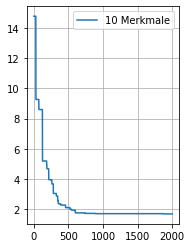

In [45]:
Merkmal_10=genAlg(2000, 50, 10, 0.05, "10 Merkmale")
print("Distanz bei 10 Merkmalen: ", Merkmal_10)


#### Music Feature Selection
2. Implementieren und beschreiben Sie kurz das Konzept ihrer Kreuzungs- und Mutationsfunktion. 

In [ ]:
#Your Code

3. Bestimmen Sie eine möglichst kleine Merkmalsuntermenge mit einem möglichst guten mittleren Rang? Geben Sie sowohl die gefundenen wichtigsten Merkmale als auch den zugehörigen mittleren Rang an.

In [ ]:
for i in range(1, 20):
    Merkmal_11=genAlg(2000, 50, 11, 0.05 , "{0} Merkmale".format(i))
    print("Distanz bei {0} Merkmalen: ", "Merkmale_{0}".format(i, 1))

4. Um wieviel verschlechtert sich der Mittlere Rang, wenn nur die 10 wichtigsten Merkmale benutzt werden?

## Clustering und automatische Playlistgenerierung
Implementieren Sie ein hierarchisches Clustering aller Subsequenzen in _subFeaturesTrain1.csv_. Diese _.csv_-Datei enthält nur die im vorigen Schritt ermittelten wichtigsten Merkmale. Das hierarchische Clustering ist in einem Dendrogram der Art wie in der unten gegebenen Abbildung zu visualisieren.

Die gefundenen Cluster sind mit den zugehörigen Musiktiteln in der Konsole auszugeben. 
![Abbildung Music Clustering](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/playlistCluster.png "Music Clustering")

**Aufgaben:**

1. Optimieren Sie die Parameter

    1. metric (Ähnlichkeitsmaß)
    2. linkage method
    3. Clusteranzahl

In [ ]:
df_= pd.read_csv("./subFeaturesTrain1.csv", sep=",")

2. Für welche Parameterkonstellation erlangen Sie das für Sie subjektiv betrachtet günstigste Ergebnis?

3. Überlegen Sie sich Ansätze um diese Art der Musikgruppierung zu verbessern?